In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, accuracy_score
import ace_tools_open as tools

df = pd.read_csv(r'C:\Users\gmoor\Documents\REVISED CAPSTONE PROJECT\Data\first200_final_output_nonormalization_REVISED.csv')

In [13]:
pd.set_option('display.max_colwidth', None)
df

,segment_id_x,100m_segment_id,Year,roadkill_count,min_dist_1,min_dist_2,min_dist_3,geometry,buffer_size,segment_type,...,ndvi_mean,ndvi_std,ndwi_mean,ndwi_std,ndbi_mean,ndbi_std,ndvi_category,ndwi_category,ndbi_category,200m_segment_id
0,1-4,1.0,2007,0.0,142.830604,NaN,NaN,"LINESTRING (240608.08343186945 4277443.022508146, 240572.7620475572 4277536.574248869)",100,100m,...,0.137357,0.065126,-0.151509,0.058490,-0.034694,0.035111,low - lower,very low - upper,low - lower,NaN
1,1-4,1.0,2008,0.0,142.830604,NaN,NaN,"LINESTRING (240608.08343186945 4277443.022508146, 240572.7620475572 4277536.574248869)",100,100m,...,0.089838,0.060953,-0.110089,0.058429,-0.005116,0.028659,very low - upper,very low - upper,low - lower,NaN
2,1-4,1.0,2009,0.0,142.830604,NaN,NaN,"LINESTRING (240608.08343186945 4277443.022508146, 240572.7620475572 4277536.574248869)",100,100m,...,0.126385,0.078132,-0.151369,0.070265,-0.028157,0.042042,low - lower,very low - upper,low - lower,NaN
3,1-4,1.0,2010,0.0,97.733578,142.830604,NaN,"LINESTRING (240608.08343186945 4277443.022508146, 240572.7620475572 4277536.574248869)",100,100m,...,0.131454,0.076573,-0.155024,0.068975,-0.032685,0.041611,low - lower,very low - upper,low - lower,NaN
4,1-4,1.0,2011,0.0,23.246441,97.733578,142.830604,"LINESTRING (240608.08343186945 4277443.022508146, 240572.7620475572 4277536.574248869)",100,100m,...,0.134024,0.081698,-0.157169,0.074240,-0.040817,0.046034,low - lower,very low - upper,low - lower,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454,73-80,NaN,2018,0.0,43.412906,47.037893,50.636979,"LINESTRING (454296.1375965928 4470350.776798868, 454479.0246901674 4470269.83804172)",400,200m,...,0.403632,0.103676,-0.458576,0.078557,0.055825,0.107496,decent - lower,very low - lower,decent - lower,10.0
2455,73-80,NaN,2019,0.0,43.412906,47.037893,50.636979,"LINESTRING (454296.1375965928 4470350.776798868, 454479.0246901674 4470269.83804172)",400,200m,...,0.451493,0.106719,-0.480616,0.085251,-0.027022,0.109428,decent - lower,very low - lower,low - upper,10.0
2456,73-80,NaN,2020,0.0,43.412906,47.037893,50.636979,"LINESTRING (454296.1375965928 4470350.776798868, 454479.0246901674 4470269.83804172)",400,200m,...,0.401417,0.101496,-0.454207,0.074238,0.055597,0.099558,decent - lower,very low - lower,decent - lower,10.0
2457,73-80,NaN,2021,0.0,43.412906,47.037893,50.636979,"LINESTRING (454296.1375965928 4470350.776798868, 454479.0246901674 4470269.83804172)",400,200m,...,0.428800,0.071618,-0.435612,0.045682,-0.035683,0.067640,decent - lower,very low - lower,low - upper,10.0


In [3]:
# Thresholds have already been defined and assigned in the previous script
# Each sensor type has a different threshold

# Define category mapping (1 = very low - lower, 8 = dense - upper)
category_mapping = {
    "very low - lower": 1,
    "very low - upper": 2,
    "low - lower": 3,
    "low - upper": 4,
    "decent - lower": 5,
    "decent - upper": 6,
    "dense - lower": 7,
    "dense - upper": 8
}

# Apply mapping to category columns
df["ndvi_category_numeric"] = df["ndvi_category"].map(category_mapping)
df["ndwi_category_numeric"] = df["ndwi_category"].map(category_mapping)
df["ndbi_category_numeric"] = df["ndbi_category"].map(category_mapping)


In [4]:
# Display dataset with numeric categories
tools.display_dataframe_to_user(name="Dataset with Numeric Categories and Roadkill Present Column", dataframe=df)

Dataset with Numeric Categories and Roadkill Present Column


In [15]:
# Define valid segment types and buffer sizes
segment_combinations = {
    "100m": [100, 200, 300],
    "200m": [200, 300, 400]
}    

### Splitting df by Sensor Type

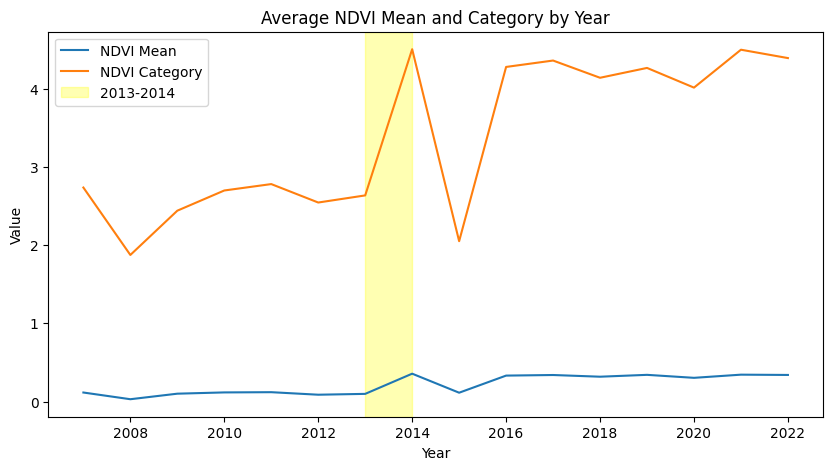

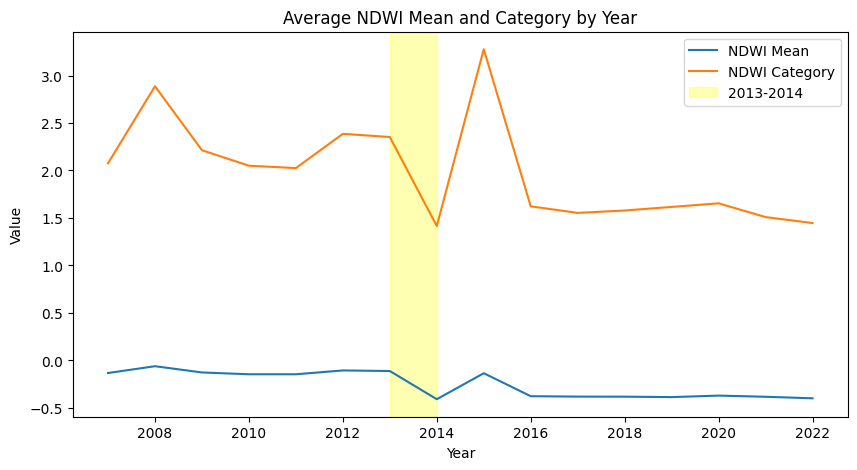

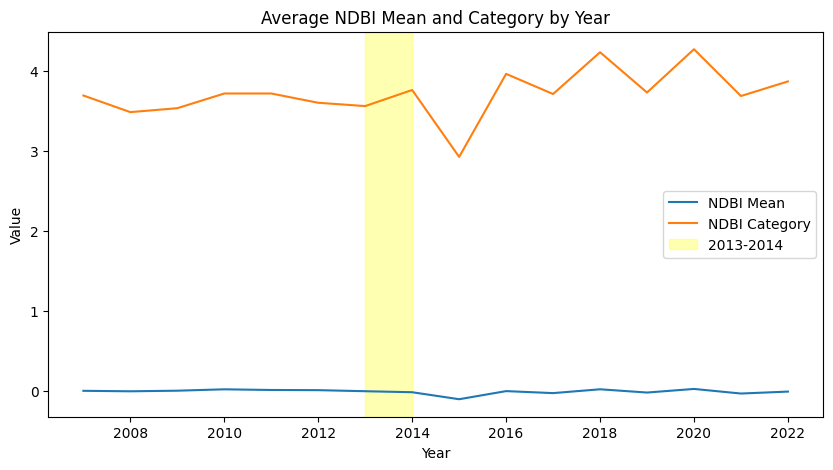

In [19]:
# Group df by year
df_grouped = df.groupby("year")

# Line graph of average ndvi_mean and ndvi_category_numeric by year
plt.figure(figsize=(10, 5))
plt.plot(df_grouped["ndvi_mean"].mean(), label="NDVI Mean")
plt.plot(df_grouped["ndvi_category_numeric"].mean(), label="NDVI Category")
plt.axvspan(2013, 2014, color='yellow', alpha=0.3, label='2013-2014')
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Average NDVI Mean and Category by Year")
plt.legend()
plt.show()

# Line graph of average ndwi_mean and ndwi_category_numeric by year
plt.figure(figsize=(10, 5))
plt.plot(df_grouped["ndwi_mean"].mean(), label="NDWI Mean")
plt.plot(df_grouped["ndwi_category_numeric"].mean(), label="NDWI Category")
plt.axvspan(2013, 2014, color='yellow', alpha=0.3, label='2013-2014')
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Average NDWI Mean and Category by Year")
plt.legend()
plt.show()

# Line graph of average ndbi_mean and ndbi_category_numeric by year
plt.figure(figsize=(10, 5))
plt.plot(df_grouped["ndbi_mean"].mean(), label="NDBI Mean")
plt.plot(df_grouped["ndbi_category_numeric"].mean(), label="NDBI Category")
plt.axvspan(2013, 2014, color='yellow', alpha=0.3, label='2013-2014')
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Average NDBI Mean and Category by Year")
plt.legend()
plt.show()

In [7]:
# Filter data for the years 2013, 2014, and 2015
df_2013 = df[df['year'] == 2013]
df_2014 = df[df['year'] == 2014]
df_2015 = df[df['year'] == 2015]

# Calculate the means for each index in 2013, 2014, and 2015
ndvi_mean_2013 = df_2013['ndvi_mean'].mean()
ndvi_mean_2014 = df_2014['ndvi_mean'].mean()
ndvi_mean_2015 = df_2015['ndvi_mean'].mean()
ndwi_mean_2013 = df_2013['ndwi_mean'].mean()
ndwi_mean_2014 = df_2014['ndwi_mean'].mean()
ndwi_mean_2015 = df_2015['ndwi_mean'].mean()
ndbi_mean_2013 = df_2013['ndbi_mean'].mean()
ndbi_mean_2014 = df_2014['ndbi_mean'].mean()
ndbi_mean_2015 = df_2015['ndbi_mean'].mean()

# Calculate the changes in means between 2013 and 2014, and between 2014 and 2015 for each index
ndvi_change_2013_2014 = ndvi_mean_2014 - ndvi_mean_2013
ndwi_change_2013_2014 = ndwi_mean_2014 - ndwi_mean_2013
ndbi_change_2013_2014 = ndbi_mean_2014 - ndbi_mean_2013

ndvi_change_2014_2015 = ndvi_mean_2015 - ndvi_mean_2014
ndwi_change_2014_2015 = ndwi_mean_2015 - ndwi_mean_2014
ndbi_change_2014_2015 = ndbi_mean_2015 - ndbi_mean_2014

# Print the changes
print(f"Change in NDVI Mean from 2013 to 2014: {ndvi_change_2013_2014}")
print(f"Change in NDWI Mean from 2013 to 2014: {ndwi_change_2013_2014}")
print(f"Change in NDBI Mean from 2013 to 2014: {ndbi_change_2013_2014}")

print("-"*75)

print(f"Change in NDVI Mean from 2014 to 2015: {ndvi_change_2014_2015}")
print(f"Change in NDWI Mean from 2014 to 2015: {ndwi_change_2014_2015}")
print(f"Change in NDBI Mean from 2014 to 2015: {ndbi_change_2014_2015}")

Change in NDVI Mean from 2013 to 2014: 0.25803644291063926
Change in NDWI Mean from 2013 to 2014: -0.2969447036465178
Change in NDBI Mean from 2013 to 2014: -0.012645466819246557
---------------------------------------------------------------------------
Change in NDVI Mean from 2014 to 2015: -0.2431437777306897
Change in NDWI Mean from 2014 to 2015: 0.2736453040318567
Change in NDBI Mean from 2014 to 2015: -0.0874314622342212


### Using Actual Spectral Means and roadkill_count

[0. 1.]
Processing Segment Type: 100m, Buffer Size: 100


c:\Users\gmoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


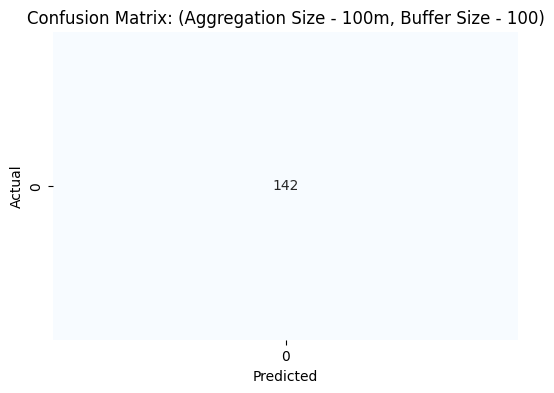

Processing Segment Type: 100m, Buffer Size: 200


c:\Users\gmoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


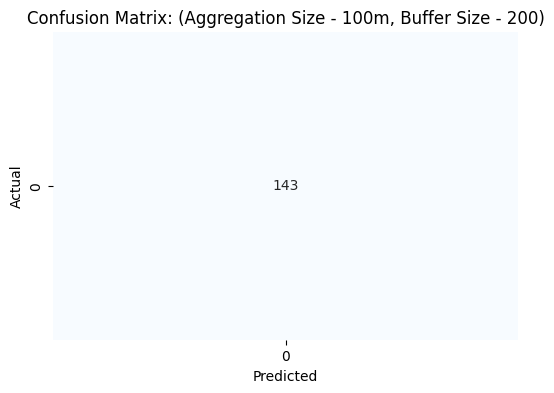

Processing Segment Type: 100m, Buffer Size: 300


c:\Users\gmoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


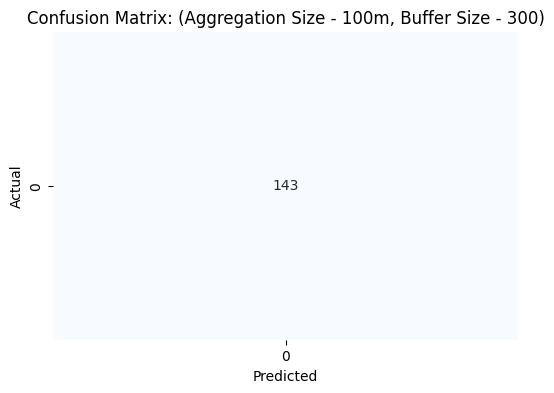

Processing Segment Type: 200m, Buffer Size: 200


c:\Users\gmoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


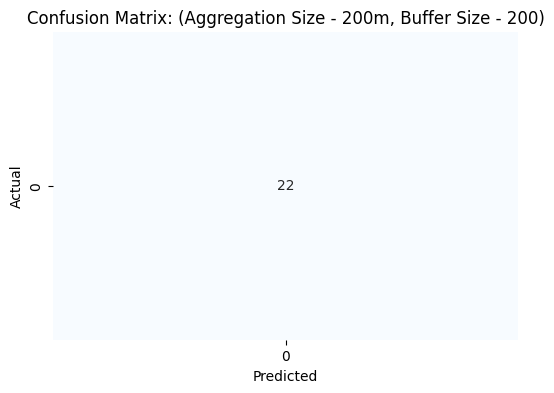

Processing Segment Type: 200m, Buffer Size: 300


c:\Users\gmoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


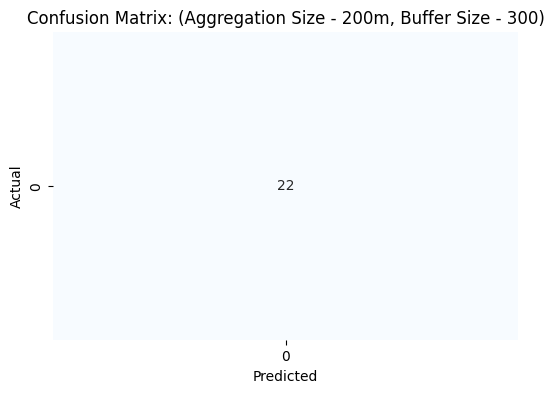

Processing Segment Type: 200m, Buffer Size: 400


c:\Users\gmoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


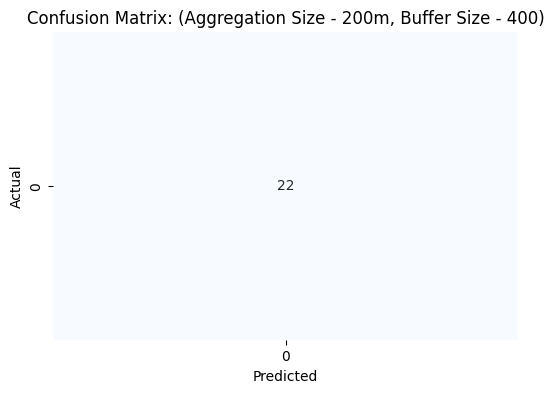

In [17]:
# All possible values of roadkill_count within the dataset 
print(df['roadkill_count'].unique())

# Store results and confusion matrices
results = []
predictions_list = []

# Loop through each segment type and buffer size combination
for segment_type, buffer_sizes in segment_combinations.items():
    for buffer_size in buffer_sizes:
        print(f"Processing Segment Type: {segment_type}, Buffer Size: {buffer_size}")

        # Filter data
        subset = df[(df["segment_type"] == segment_type) & (df["buffer_size"] == buffer_size)]

        # Ensure sufficient data
        if subset.shape[0] < 10:
            print(f"Skipping {segment_type} {buffer_size} due to insufficient data.")
            continue
        
        # Define features and target variable
        X = subset[['ndvi_mean', 'ndwi_mean', 'ndbi_mean']] # Actual Mean Values
        y = subset['roadkill_count'].astype(int)  # Convert to integer for classification

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train RandomForestClassifier
        rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
        rf_model.fit(X_train, y_train)

        # Predict on test set
        y_pred = rf_model.predict(X_test)

        # Store actual and predicted values
        predictions_df = pd.DataFrame({
            "Actual": y_test.values,
            "Predicted": y_pred,
            "Aggregation Size": segment_type,
            "Buffer Size": buffer_size
        })
        predictions_list.append(predictions_df)

        # Compute evaluation metrics
        mse = mean_squared_error(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store results
        results.append({
            "Aggregation Size": segment_type,
            "Buffer Size": buffer_size,
            "Mean Squared Error": mse,
            "Accuracy": accuracy,
            "R-squared Score": r2
        })
        
        # Display confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f"Confusion Matrix: (Aggregation Size - {segment_type}, Buffer Size - {buffer_size})")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()


In [10]:
y_test.describe()

count    22.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: roadkill_count, dtype: float64

In [11]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("Final Comparison of Aggregation and Buffer Sizes:")
print(results_df.sort_values(by="R-squared Score", ascending=False))

print("-"*100)

all_predictions_df = pd.concat(predictions_list, ignore_index=True)
tools.display_dataframe_to_user(name="All Predictions", dataframe=all_predictions_df.sort_values(by="Actual", ascending=False))


Final Comparison of Aggregation and Buffer Sizes:
  Aggregation Size  Buffer Size  Mean Squared Error  Accuracy  R-squared Score
0             100m          100                 0.0       1.0              1.0
1             100m          200                 0.0       1.0              1.0
2             100m          300                 0.0       1.0              1.0
3             200m          200                 0.0       1.0              1.0
4             200m          300                 0.0       1.0              1.0
5             200m          400                 0.0       1.0              1.0
----------------------------------------------------------------------------------------------------
All Predictions


##### With y_pred_adjusted

In [14]:
y_prob = rf_model.predict_proba(X_test)[:, 1]

print(y_prob)


[0.   0.   0.   0.02 0.   0.26 0.   0.   0.02 0.   0.06 0.02 0.   0.02
 0.   0.   0.   0.   0.   0.   0.   0.  ]


In [ ]:
# Store results and confusion matrices
results = []
predictions_list = []

# Loop through each segment type and buffer size combination
for segment_type, buffer_sizes in segment_combinations.items():
    for buffer_size in buffer_sizes:
        print(f"Processing Segment Type: {segment_type}, Buffer Size: {buffer_size}")

        # Filter data
        subset = df[(df["segment_type"] == segment_type) & (df["buffer_size"] == buffer_size)]

        # Ensure sufficient data
        if subset.shape[0] < 10:
            print(f"Skipping {segment_type} {buffer_size} due to insufficient data.")
            continue

        # Store actual and predicted values
        predictions_df = pd.DataFrame({
            "Actual": y_test.values,
            "Predicted": y_pred_adjusted,
            "Aggregation Size": segment_type,
            "Buffer Size": buffer_size
        })
        predictions_list.append(predictions_df)

        # Compute evaluation metrics
        mse = mean_squared_error(y_test, y_pred_adjusted)
        accuracy = accuracy_score(y_test, y_pred_adjusted)
        conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
        r2 = r2_score(y_test, y_pred_adjusted)

        # Store results
        results.append({
            "Aggregation Size": segment_type,
            "Buffer Size": buffer_size,
            "Mean Squared Error": mse,
            "Accuracy": accuracy,
            "R-squared Score": r2
        })
        
        # Display confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix: (Aggregation Size - {segment_type}, Buffer Size - {buffer_size})")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()


In [ ]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("Final Comparison of Aggregation and Buffer Sizes:")
print(results_df.sort_values(by="R-squared Score", ascending=False))

print("-"*100)

all_predictions_df = pd.concat(predictions_list, ignore_index=True)
tools.display_dataframe_to_user(name="All Predictions", dataframe=all_predictions_df.sort_values(by="Actual", ascending=False))


### Using Actual Spectral Means and Roadkill Present Indicator (1 = Roadkill Present when Roadkill_count > 0)

In [ ]:
# Define target variable (binary classification: presence vs. absence of roadkill)
df["roadkill_present"] = (df["roadkill_count"] > 0 ).astype(int)

print("Roadkill_count mean:", df['roadkill_count'].mean())

roadkill_present_counts = df['roadkill_present'].value_counts()
print('\n', roadkill_present_counts)

In [ ]:
# Store results and confusion matrices
results = []
predictions_list = []

# Loop through each segment type and buffer size combination
for segment_type, buffer_sizes in segment_combinations.items():
    for buffer_size in buffer_sizes:
        print(f"Processing Segment Type: {segment_type}, Buffer Size: {buffer_size}")

        # Filter data
        subset = df[(df["segment_type"] == segment_type) & (df["buffer_size"] == buffer_size)]

        # Ensure sufficient data
        if subset.shape[0] < 10:
            print(f"Skipping {segment_type} {buffer_size} due to insufficient data.")
            continue
        
        # Define features and target variable
        X = subset[['ndvi_mean', 'ndwi_mean', 'ndbi_mean']] # Actual Mean Values
        y = subset['roadkill_present']  # Binary classification

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train RandomForestClassifier
        rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
        rf_model.fit(X_train, y_train)

        # Predict on test set
        y_pred = rf_model.predict(X_test)

        # Store actual and predicted values
        predictions_df = pd.DataFrame({
            "Actual": y_test.values,
            "Predicted": y_pred,
            "Aggregation Size": segment_type,
            "Buffer Size": buffer_size
        })
        predictions_list.append(predictions_df)

        # Compute evaluation metrics
        mse = mean_squared_error(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store results
        results.append({
            "Aggregation Size": segment_type,
            "Buffer Size": buffer_size,
            "Mean Squared Error": mse,
            "Accuracy": accuracy,
            "R-squared Score": r2
        })
        
        # Display confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix: (Aggregation Size - {segment_type}, Buffer Size - {buffer_size})")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()


In [ ]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("Final Comparison of Aggregation and Buffer Sizes:")
print(results_df.sort_values(by="R-squared Score", ascending=False))

print("-"*100)

all_predictions_df = pd.concat(predictions_list, ignore_index=True)
tools.display_dataframe_to_user(name="All Predictions", dataframe=all_predictions_df.sort_values(by="Actual", ascending=False))


### Using Categorized Spectral Indices and roadkill_count

In [ ]:
# Store results and confusion matrices
results = []
predictions_list = []

# Loop through each segment type and buffer size combination
for segment_type, buffer_sizes in segment_combinations.items():
    for buffer_size in buffer_sizes:
        print(f"Processing Segment Type: {segment_type}, Buffer Size: {buffer_size}")

        # Filter data
        subset = df[(df["segment_type"] == segment_type) & (df["buffer_size"] == buffer_size)]

        # Ensure sufficient data
        if subset.shape[0] < 10:
            print(f"Skipping {segment_type} {buffer_size} due to insufficient data.")
            continue
        
        # Define features and target variable
        X = subset[['ndvi_category_numeric', 'ndwi_category_numeric', 'ndbi_category_numeric']] # Categorized Indices
        y = subset['roadkill_count']  # Actual roadkill count

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train RandomForestClassifier
        rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
        rf_model.fit(X_train, y_train)

        # Predict on test set
        y_pred = rf_model.predict(X_test)

        # Store actual and predicted values
        predictions_df = pd.DataFrame({
            "Actual": y_test.values,
            "Predicted": y_pred,
            "Aggregation Size": segment_type,
            "Buffer Size": buffer_size
        })
        predictions_list.append(predictions_df)

        # Compute evaluation metrics
        mse = mean_squared_error(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store results
        results.append({
            "Aggregation Size": segment_type,
            "Buffer Size": buffer_size,
            "Mean Squared Error": mse,
            "Accuracy": accuracy,
            "R-squared Score": r2
        })
        
        # Display confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix: (Aggregation Size - {segment_type}, Buffer Size - {buffer_size})")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()


In [ ]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("Final Comparison of Aggregation and Buffer Sizes:")
print(results_df.sort_values(by="R-squared Score", ascending=False))

print("-"*100)

all_predictions_df = pd.concat(predictions_list, ignore_index=True)
tools.display_dataframe_to_user(name="All Predictions", dataframe=all_predictions_df.sort_values(by="Actual", ascending=False))


### Using Categorized Spectral Indices and Present Indicator

In [ ]:
# Store results and confusion matrices
results = []
predictions_list = []

# Loop through each segment type and buffer size combination
for segment_type, buffer_sizes in segment_combinations.items():
    for buffer_size in buffer_sizes:
        print(f"Processing Segment Type: {segment_type}, Buffer Size: {buffer_size}")

        # Filter data
        subset = df[(df["segment_type"] == segment_type) & (df["buffer_size"] == buffer_size)]

        # Ensure sufficient data
        if subset.shape[0] < 10:
            print(f"Skipping {segment_type} {buffer_size} due to insufficient data.")
            continue
        
        # Define features and target variable
        X = subset[['ndvi_category_numeric', 'ndwi_category_numeric', 'ndbi_category_numeric']] # Categorized Indices
        y = subset['roadkill_present']  # Binary classification

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train RandomForestClassifier
        rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
        rf_model.fit(X_train, y_train)

        # Predict on test set
        y_pred = rf_model.predict(X_test)

        # Store actual and predicted values
        predictions_df = pd.DataFrame({
            "Actual": y_test.values,
            "Predicted": y_pred,
            "Aggregation Size": segment_type,
            "Buffer Size": buffer_size
        })
        predictions_list.append(predictions_df)

        # Compute evaluation metrics
        mse = mean_squared_error(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store results
        results.append({
            "Aggregation Size": segment_type,
            "Buffer Size": buffer_size,
            "Mean Squared Error": mse,
            "Accuracy": accuracy,
            "R-squared Score": r2
        })
        
        # Display confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix: (Aggregation Size - {segment_type}, Buffer Size - {buffer_size})")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()


In [ ]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("Final Comparison of Aggregation and Buffer Sizes:")
print(results_df.sort_values(by="R-squared Score", ascending=False))

print("-"*100)

all_predictions_df = pd.concat(predictions_list, ignore_index=True)
tools.display_dataframe_to_user(name="All Predictions", dataframe=all_predictions_df.sort_values(by="Actual", ascending=False))


### Roadkill_count Distribution

##### Sample Data:

In [14]:
# First 200 Road Segments Sample

# List all possible values of roadkill_count within the data
print(df['roadkill_count'].unique())

[0. 1.]


In [ ]:

# Plot distribution of roadkill_count (Sampled Data)
plt.figure(figsize=(10, 5))
sns.histplot(df['roadkill_count'], bins=20, kde=True, color="blue")
plt.xlabel("Roadkill Count")
plt.ylabel("Frequency")
plt.title("Distribution of Roadkill Count (Sampled Data)")
plt.grid(True)
plt.show()

# Plot violin plot of roadkill_count
plt.figure(figsize=(10, 5))
sns.violinplot(x=df['roadkill_count'], color="purple")
plt.xlabel("Roadkill Count")
plt.title("Violin Plot of Roadkill Count (Sampled Data)")
plt.grid(True)
plt.show()


# Display summary statistics
roadkill_stats = df['roadkill_count'].describe()
print("Summary Statistics for Roadkill Count (Sample Data):")
print(roadkill_stats)

In [1]:
# First 6000 Road Segment Sample 
import geopandas as gpd

df_6000rd = gpd.read_file(r'C:\Users\gmoor\Documents\Capstone Project\Data\road_segment_panel_data_with_buffer_filtered_segments_50miles.gpkg')

In [2]:
df_6000rd

,segment_id,Year,roadkill_count,min_dist_1,min_dist_2,min_dist_3,geometry
0,1,2007,0.0,142.835782,NaN,NaN,"LINESTRING (240608.083 4277443.023, 240599.354..."
1,1,2008,0.0,142.835782,NaN,NaN,"LINESTRING (240608.083 4277443.023, 240599.354..."
2,1,2009,0.0,142.835782,NaN,NaN,"LINESTRING (240608.083 4277443.023, 240599.354..."
3,1,2010,0.0,97.711746,142.835782,NaN,"LINESTRING (240608.083 4277443.023, 240599.354..."
4,1,2011,0.0,23.223275,97.711746,142.835782,"LINESTRING (240608.083 4277443.023, 240599.354..."
...,...,...,...,...,...,...,...
8480043,530003,2018,0.0,45.800019,46.611483,51.412469,"LINESTRING (515222.978 4452990.634, 515224.953..."
8480044,530003,2019,0.0,45.800019,46.611483,47.064843,"LINESTRING (515222.978 4452990.634, 515224.953..."
8480045,530003,2020,0.0,45.800019,46.611483,47.064843,"LINESTRING (515222.978 4452990.634, 515224.953..."
8480046,530003,2021,0.0,45.800019,46.611483,47.064843,"LINESTRING (515222.978 4452990.634, 515224.953..."


In [11]:
# Description of df_6000rd roadkill_count
print(df_6000rd['roadkill_count'].describe())

# List all possible values of roadkill_count within the data
print(df_6000rd['roadkill_count'].unique())




count    8.480048e+06
mean     2.900219e-03
std      7.257756e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.100000e+01
Name: roadkill_count, dtype: float64
[ 0.  1.  2.  4.  3.  5. 11.  8.  6.  9.  7. 10. 21. 15. 12. 13.]


In [ ]:

unique_values = df_6000rd['roadkill_count'].value_counts(normalize=True) * 100
print(unique_values)

sns.barplot(x=unique_values.index, y=unique_values.values, palette="viridis")
plt.xlabel("Roadkill Count")
plt.ylabel("Percentage")
plt.title("Distribution of Roadkill Count (First 6000 Road Segments)")
plt.grid(True)
plt.show()


In [ ]:
# Distribution of roadkill_count (First 6000 Road Segments)